In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from keras.datasets import fashion_mnist,cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
warnings.filterwarnings("ignore")

In [2]:
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
print("Total Number of images :- ",xtrain.shape[0]+ytrain.shape[0])

Total Number of images :-  100000


In [4]:
print("No of classes present in the data :-",len(np.unique(ytrain)))

No of classes present in the data :- 10


In [5]:
print("shape of images :- ",xtrain[0].shape)

shape of images :-  (32, 32, 3)


<Figure size 432x288 with 0 Axes>

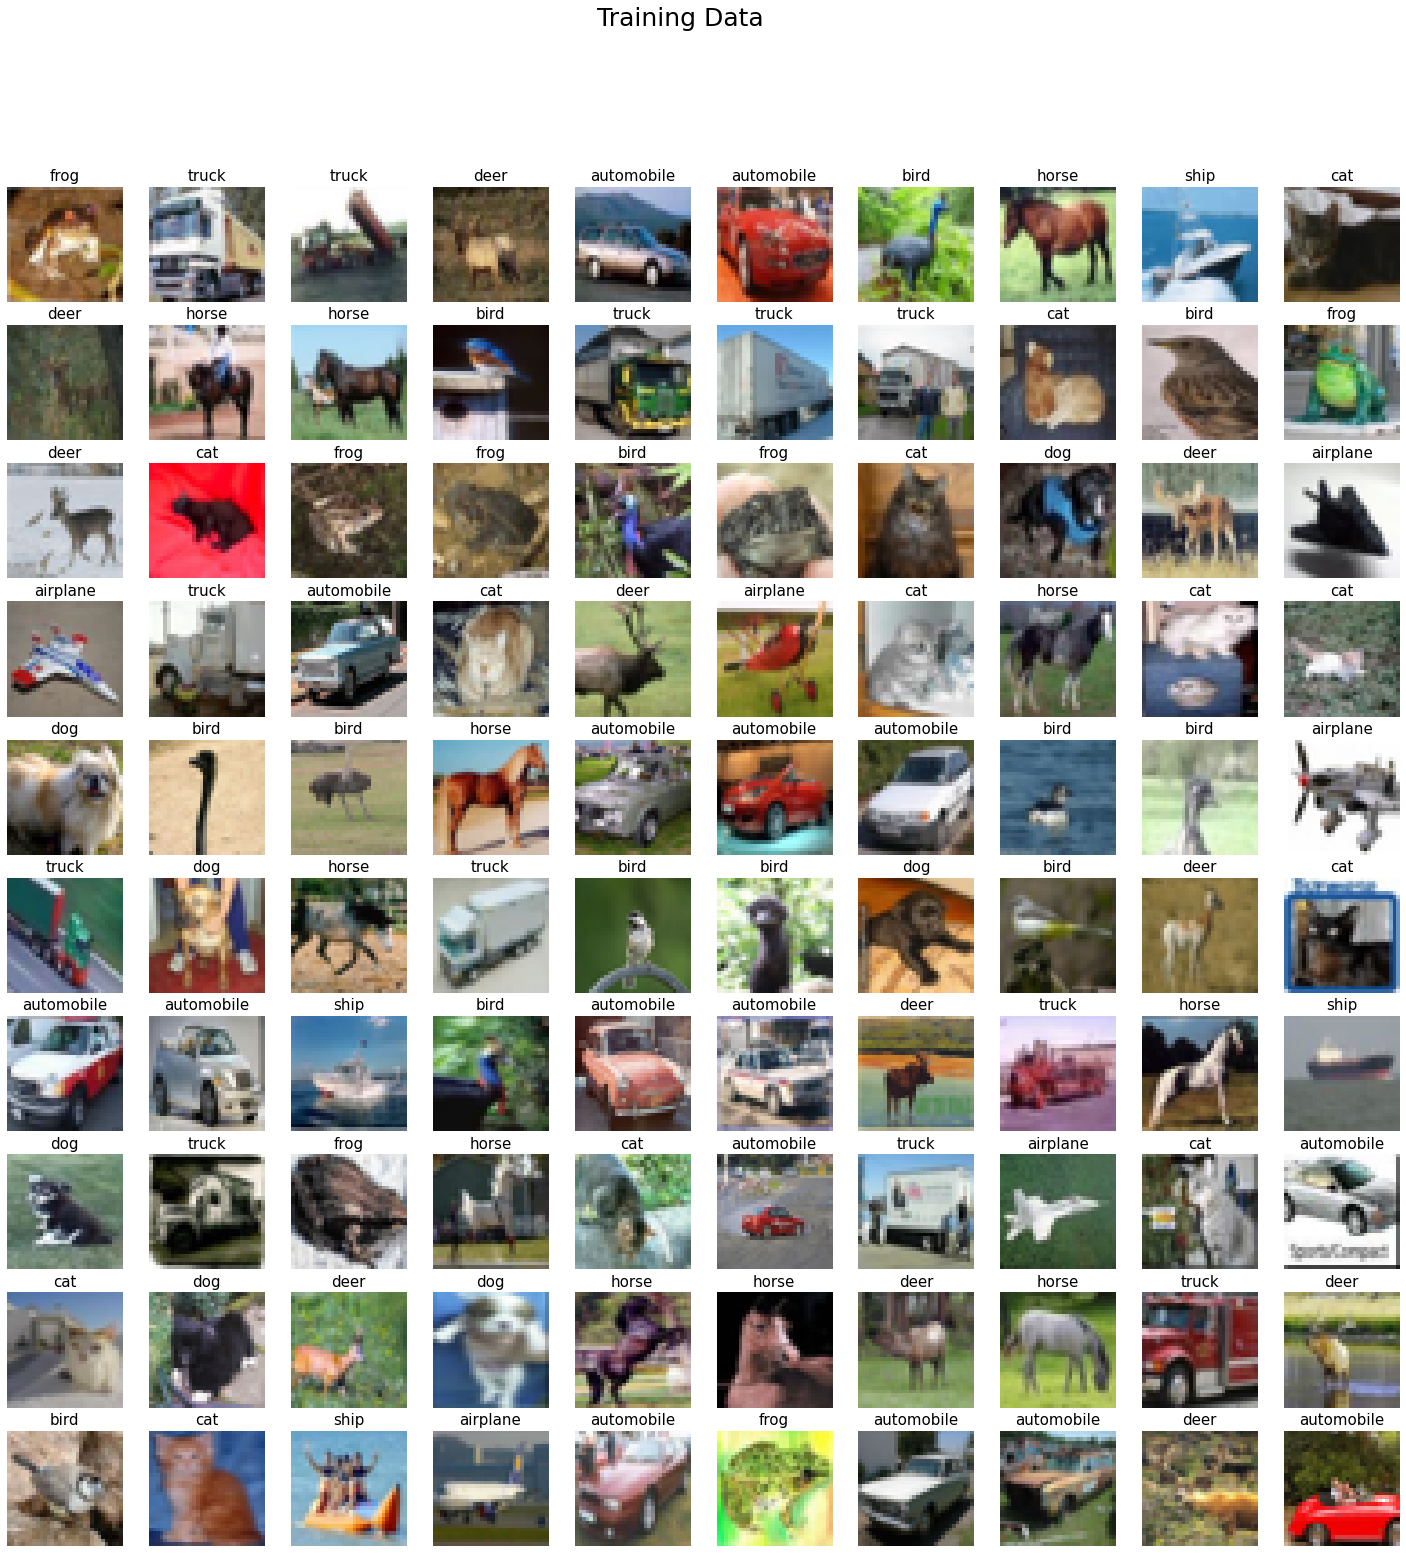

In [6]:
fig = plt.figure()
_, axs = plt.subplots(10,10, figsize=(25,25))
axs = axs.flatten()
for img, ax,k in zip(xtrain, axs,ytrain):
    ax.axis("off")
    ax.set_title(class_names[k[0]],fontsize=15)
    ax.imshow(img)
plt.suptitle('Training Data',fontsize=25)
plt.show()

In [7]:
from keras.utils import to_categorical
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

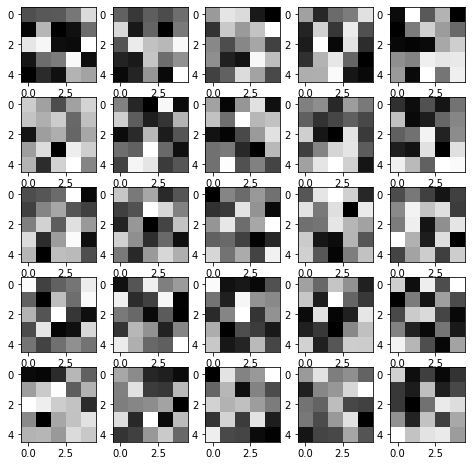

In [8]:
plt.figure(figsize=(8,8))
layers = Sequential()
x = Conv2D(filters=64,kernel_size=(5,5),input_shape=(32,32,3))
layers.add(x)
x1w = x.get_weights()[0][:,:,0,:]
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

In [9]:
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# 1st Maxpooling Layer
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# 2nd Maxpooling Layer
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# 3rd Maxpooling Layer
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())

# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)        

In [10]:
AlexNet.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [11]:
batch_size= 256
epochs=250

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,test_size=0.3,random_state=0)

In [13]:
history = AlexNet.fit(xtrain,ytrain,validation_data=(xval,yval),batch_size=batch_size,epochs = epochs)

Epoch 1/250
137/137 [==============================] - 17s 53ms/step - loss: 1.8267 - accuracy: 0.3424 - val_loss: 2.0336 - val_accuracy: 0.2979
Epoch 2/250
137/137 [==============================] - 5s 40ms/step - loss: 1.4079 - accuracy: 0.5063 - val_loss: 1.9111 - val_accuracy: 0.3343
Epoch 3/250
137/137 [==============================] - 5s 40ms/step - loss: 1.2644 - accuracy: 0.5705 - val_loss: 2.0130 - val_accuracy: 0.3091
Epoch 4/250
137/137 [==============================] - 6s 40ms/step - loss: 1.1286 - accuracy: 0.6206 - val_loss: 3.3688 - val_accuracy: 0.1937
Epoch 5/250
137/137 [==============================] - 6s 41ms/step - loss: 1.0335 - accuracy: 0.6562 - val_loss: 1.9464 - val_accuracy: 0.3521
Epoch 6/250
137/137 [==============================] - 6s 41ms/step - loss: 0.9145 - accuracy: 0.6988 - val_loss: 2.1291 - val_accuracy: 0.3147
Epoch 7/250
137/137 [==============================] - 6s 41ms/step - loss: 0.8256 - accuracy: 0.7314 - val_loss: 1.7515 - val_accuracy

In [14]:
history = pd.DataFrame(history.history)

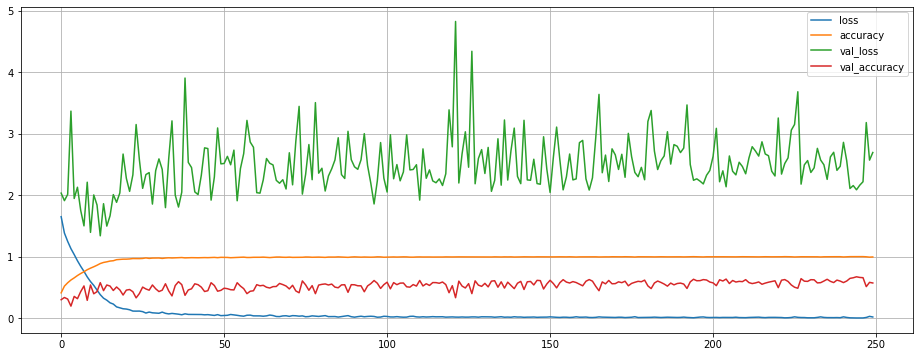

In [15]:
plt.figure(figsize=(16,6))
plt.plot(history["loss"],label='loss')
plt.plot(history["accuracy"],label='accuracy')
plt.plot(history["val_loss"],label='val_loss')
plt.plot(history["val_accuracy"],label='val_accuracy')
plt.legend()
plt.grid("whitegrid")
plt.show()

In [16]:
ypredict = np.argmax(AlexNet.predict(xtest),axis=1)

In [17]:
ytest = np.argmax(ytest,axis=1)

In [18]:
ypredict

array([3, 8, 8, ..., 5, 1, 7])

In [19]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score
print(confusion_matrix(ypredict,ytest))

[[534   8  45  21  12   6   2  14  16  21]
 [ 40 841  21  38  20  15  23  36  30 442]
 [112  17 689 164 256 146  97 155  16  46]
 [  3   9  24 331  39 101  29  31   7   9]
 [ 14   5  26  40 437  28  13  66   5   7]
 [  8   6  64 187  69 576  29 115   8  30]
 [ 22  12  65 113  91  65 766  26   4  30]
 [  9   6  10   9  22  20   6 513   1  15]
 [257  92  56  94  54  43  35  42 913 234]
 [  1   4   0   3   0   0   0   2   0 166]]


In [20]:
accuracy_score(ypredict,ytest)

0.5766